In [1]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

import seaborn as sns

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.

%matplotlib inline 
import matplotlib.pylab as plt


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
credit_df = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
credit_df.rename(columns={
    "default.payment.next.month": "default", }, inplace=True)

In [4]:
fil = (credit_df.EDUCATION == 5) | (credit_df.EDUCATION == 6) | (credit_df.EDUCATION == 0)
credit_df.loc[fil, 'EDUCATION'] = 4
credit_df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [5]:
# Mapping dictionary for EDUCATION column
education_mapping = {
    1: "Graduate school",
    2: "University",
    3: "High school",
    4: "Others"
}

# Replace the values in the EDUCATION column
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace(education_mapping)

# Verify the changes
credit_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,University,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,University,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,University,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,University,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
credit_df.loc[credit_df.MARRIAGE == 0, 'MARRIAGE'] = 3
credit_df.MARRIAGE.value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [7]:
# Mapping dictionary for EDUCATION column
marriage_mapping = {
    1: "Married",
    2: "Single",
    3: "Others"
}

# Replace the values in the EDUCATION column
credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace(marriage_mapping)

# Verify the changes
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Mapping dictionary for EDUCATION column
gender_mapping = {
    1: "Male",
    2: "Female",
    
}

# Replace the values in the EDUCATION column
credit_df['SEX'] = credit_df['SEX'].replace(gender_mapping)

# Verify the changes
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
# Print unique values for specific columns
for column in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(f"Unique values in '{column}': {credit_df[column].unique()}")

Unique values in 'SEX': ['Female' 'Male']
Unique values in 'EDUCATION': ['University' 'Graduate school' 'High school' 'Others']
Unique values in 'MARRIAGE': ['Married' 'Single' 'Others']


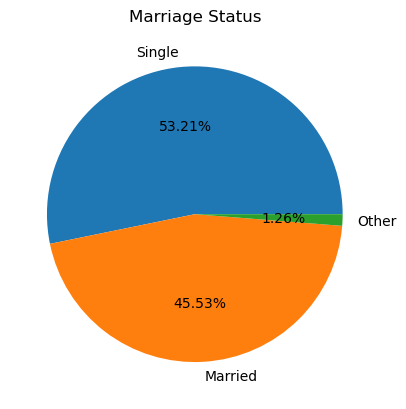

In [10]:
value_counts_marriage = credit_df['MARRIAGE'].value_counts()

plt.pie(value_counts_marriage, labels = ['Single','Married','Other'],autopct='%.2f%%' )
plt.title('Marriage Status')
plt.show()

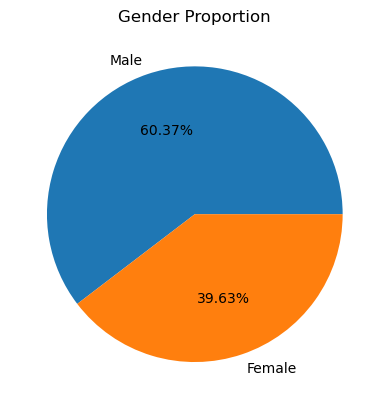

In [11]:
sex_calculation = credit_df['SEX'].value_counts()
#print(sex_calculation)
plt.pie(sex_calculation, labels = ['Male','Female'],autopct='%.2f%%')
plt.title("Gender Proportion")
plt.show()

default           Total  Default_Percentage
SEX_MARRIAGE                               
Male - Others       145           28.965517
Male - Married     5190           25.934489
Male - Single      6553           22.661376
Female - Married   8469           21.962451
Female - Others     232           20.258621
Female - Single    9411           19.721602


d:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

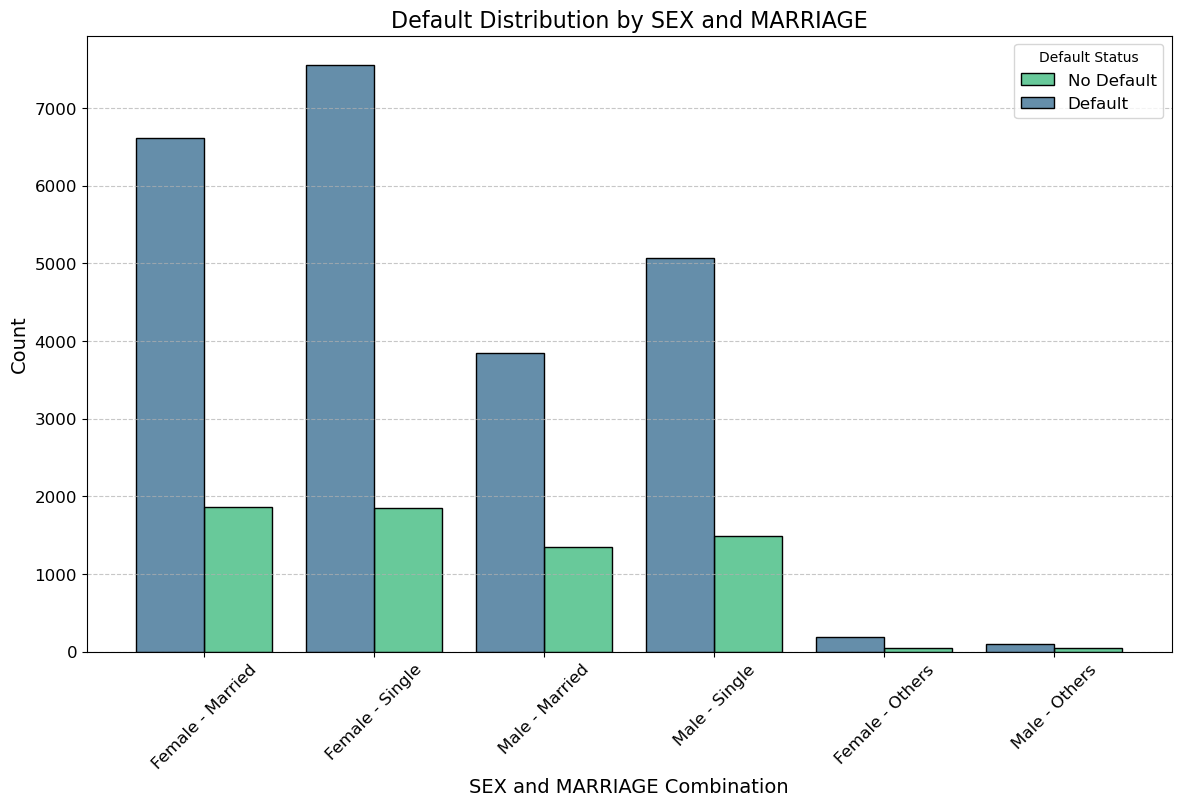

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a combined column to represent SEX and MARRIAGE
credit_df['SEX_MARRIAGE'] = credit_df['SEX'] + ' - ' + credit_df['MARRIAGE']


# Group by SEX_MARRIAGE and default to calculate counts
grouped = credit_df.groupby(['SEX_MARRIAGE', 'default']).size().unstack(fill_value=0)

# Calculate the percentages
grouped['Total'] = grouped[0] + grouped[1]
grouped['Default_Percentage'] = (grouped[1] / grouped['Total']) * 100

# Display the result
print(grouped[['Total', 'Default_Percentage']].sort_values(by='Default_Percentage', ascending=False))


# Setting up the plot grid
plt.figure(figsize=(14, 8))

# Plotting the histogram
sns.histplot(
    data=credit_df, 
    x='SEX_MARRIAGE', 
    hue='default', 
    multiple='dodge', 
    shrink=0.8, 
    palette='viridis', 
    stat='count'
)

# Adding titles and labels
plt.title('Default Distribution by SEX and MARRIAGE', fontsize=16)
plt.xlabel('SEX and MARRIAGE Combination', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()


Default Percentages by SEX and MARRIAGE:
Female - Married: 21.96%
Female - Others: 20.26%
Female - Single: 19.72%
Male - Married: 25.93%
Male - Others: 28.97%
Male - Single: 22.66%


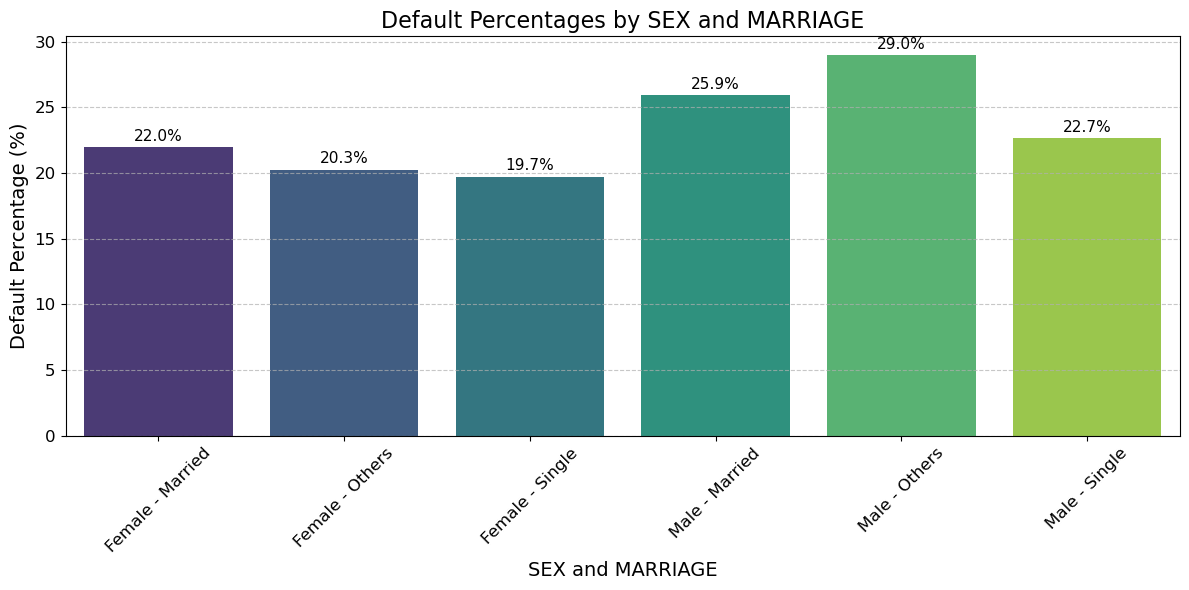

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Reset index for plotting
percentage_data = grouped[['Default_Percentage']].reset_index()

# Print the percentages before visualization
print("Default Percentages by SEX and MARRIAGE:")
for index, row in percentage_data.iterrows():
    print(f"{row['SEX_MARRIAGE']}: {row['Default_Percentage']:.2f}%")



# Plot the default percentages
plt.figure(figsize=(12, 6))
sns.barplot(
    x='SEX_MARRIAGE', 
    y='Default_Percentage', 
    data=percentage_data, 
    palette='viridis'
)

# Add titles and labels
plt.title('Default Percentages by SEX and MARRIAGE', fontsize=16)
plt.xlabel('SEX and MARRIAGE', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for i in range(len(percentage_data)):
    plt.text(
        i, 
        percentage_data['Default_Percentage'][i] + 0.5, 
        f"{percentage_data['Default_Percentage'][i]:.1f}%", 
        ha='center', fontsize=11, color='black'
    )

plt.tight_layout()
plt.show()


In [67]:
credit_df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [145]:
# Define age group bins and labels
bins = [20, 30, 40, 80]  # Bin edges for age groups
labels = ['Young', 'Middle', 'Old']  # Labels for age groups

# Create a new column for age groups
credit_df['Age_Group'] = pd.cut(credit_df['AGE'], bins=bins, labels=labels, right=False)

# Print the number of data points in each age group
age_group_counts = credit_df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

print(age_group_counts)


  Age_Group  Count
0    Middle  11238
1     Young   9618
2       Old   9144


In [71]:
# Define quantile-based bins for age groups
credit_df['Age_Group'] = pd.qcut(credit_df['AGE'], q=3, labels=['Young', 'Middle-Aged', 'Old'])

# Print the number of data points in each age group
age_group_counts = credit_df['Age_Group'].value_counts().reset_index()
age_group_counts.columns = ['Age_Group', 'Count']

print(age_group_counts)


     Age_Group  Count
0        Young  11013
1  Middle-Aged   9843
2          Old   9144


     Age_Group  Default_Percentage
0        Young           22.437120
1  Middle-Aged           20.339327
2          Old           23.654856


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/3068507816.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_df.groupby('Age_Group')['default']
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/3068507816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


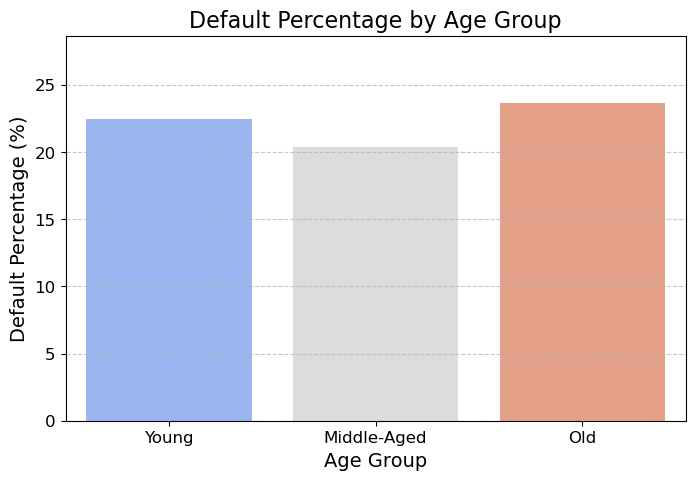

In [73]:
# Calculate default percentage for each age group
age_group_default_summary = (
    credit_df.groupby('Age_Group')['default']
    .mean()
    .reset_index()
    .rename(columns={'default': 'Default_Percentage'})
)

# Convert to percentage
age_group_default_summary['Default_Percentage'] *= 100

# Display the data
print(age_group_default_summary)

# Visualization of default percentage by age group
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Age_Group',
    y='Default_Percentage',
    data=age_group_default_summary,
    palette='coolwarm'
)
plt.title('Default Percentage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, age_group_default_summary['Default_Percentage'].max() + 5)  # Add some space above the max value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


  Age_Group_10yr  Default_Percentage
0          20-29           22.842587
1          30-39           20.252714
2          40-49           22.973391
3          50-59           24.861170
4          60-69           28.343949
5          70-79           28.000000


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/601505483.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_df.groupby('Age_Group_10yr')['default']
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/601505483.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


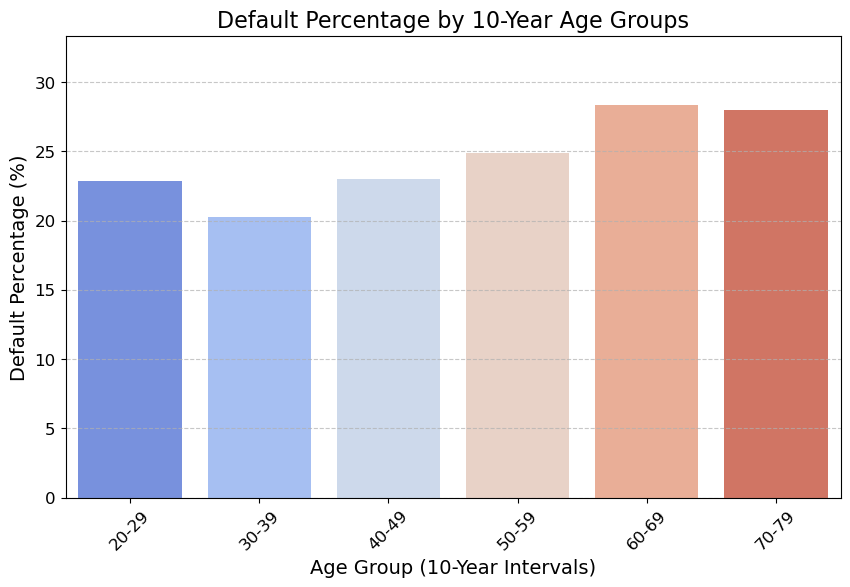

In [75]:
# Define bins and labels for 10-year age groups
bins = range(20, 81, 10)  # From 20 to 80 with intervals of 10
labels = [f'{bins[i]}-{bins[i+1] - 1}' for i in range(len(bins) - 1)]

# Create the age group column
credit_df['Age_Group_10yr'] = pd.cut(credit_df['AGE'], bins=bins, labels=labels, right=False)

# Calculate default percentage for each 10-year age group
age_group_default_10yr_summary = (
    credit_df.groupby('Age_Group_10yr')['default']
    .mean()
    .reset_index()
    .rename(columns={'default': 'Default_Percentage'})
)

# Convert to percentage
age_group_default_10yr_summary['Default_Percentage'] *= 100

# Display the data
print(age_group_default_10yr_summary)

# Visualization of default percentage by 10-year age group
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Age_Group_10yr',
    y='Default_Percentage',
    data=age_group_default_10yr_summary,
    palette='coolwarm'
)
plt.title('Default Percentage by 10-Year Age Groups', fontsize=16)
plt.xlabel('Age Group (10-Year Intervals)', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, age_group_default_10yr_summary['Default_Percentage'].max() + 5)  # Add space above max value
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [81]:
credit_df.rename(columns={
    "default.payment.next.month": "default", 
    'PAY_0': 'status_sept', 
    'PAY_2': 'status_aug', 
    'PAY_3': 'status_jul', 
    'PAY_4': 'status_jun', 
    'PAY_5': 'status_may', 
    'PAY_6': 'status_apr'
}, inplace=True)

# Print the updated column names
credit_df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')

In [95]:
# Mapping dictionary with shorter names using "d"
status_mapping = {
    -2: "No use",
    -1: "Paid full",
    0: "Revolving",
    1: "1d",
    2: "2d",
    3: "3d",
    4: "4d",
    5: "5d",
    6: "6d",
    7: "7d",
    8: "8d",
    9: "9+d"
}

# Apply the mapping to all status columns
status_columns = ['status_sept', 'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr']

credit_df[status_columns] = credit_df[status_columns].replace(status_mapping)

# Verify the changes
print(credit_df[status_columns].head())

  status_sept status_aug status_jul status_jun status_may status_apr
0          2d         2d  Paid full  Paid full     No use     No use
1   Paid full         2d  Revolving  Revolving  Revolving         2d
2   Revolving  Revolving  Revolving  Revolving  Revolving  Revolving
3   Revolving  Revolving  Revolving  Revolving  Revolving  Revolving
4   Paid full  Revolving  Paid full  Revolving  Revolving  Revolving


   status_sept  Default_Percentage
6           7d           77.777778
2           3d           75.776398
1           2d           69.141357
3           4d           68.421053
7           8d           57.894737
5           6d           54.545455
4           5d           50.000000
0           1d           33.947939
9    Paid full           16.778051
8       No use           13.229431
10   Revolving           12.811291


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2283825612.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


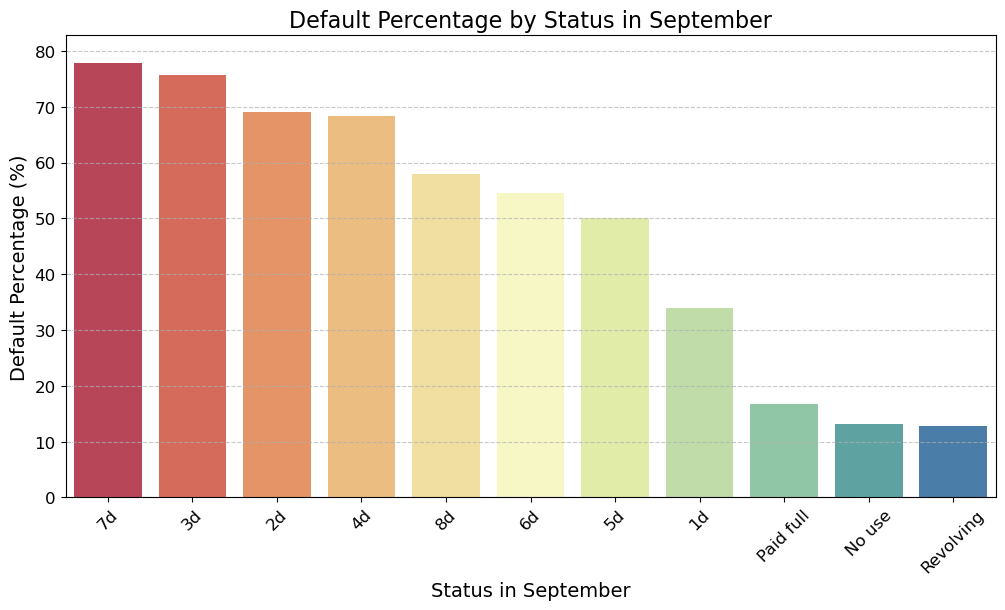

In [85]:
# Calculate default percentage for each unique value in status_sept
status_default_summary = (
    credit_df.groupby('status_sept')['default']
    .mean()
    .reset_index()
    .rename(columns={'default': 'Default_Percentage'})
)

# Convert to percentage
status_default_summary['Default_Percentage'] *= 100

# Sort values for better visualization
status_default_summary = status_default_summary.sort_values(by='Default_Percentage', ascending=False)

# Display the calculated default percentages
print(status_default_summary)

# Visualization of default percentages by status_sept
plt.figure(figsize=(12, 6))
sns.barplot(
    x='status_sept',
    y='Default_Percentage',
    data=status_default_summary,
    palette='Spectral'
)
plt.title('Default Percentage by Status in September', fontsize=16)
plt.xlabel('Status in September', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, status_default_summary['Default_Percentage'].max() + 5)  # Add some space above max value
plt.show()


  status_sept  Default_Percentage
7      No use           13.229431
8   Paid full           16.778051
9   Revolving           12.811291
0          1d           33.947939
1          2d           69.141357
2          3d           75.776398
3          4d           68.421053
4          5d           50.000000
5          6d           54.545455
6          7d           77.777778


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2360538414.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


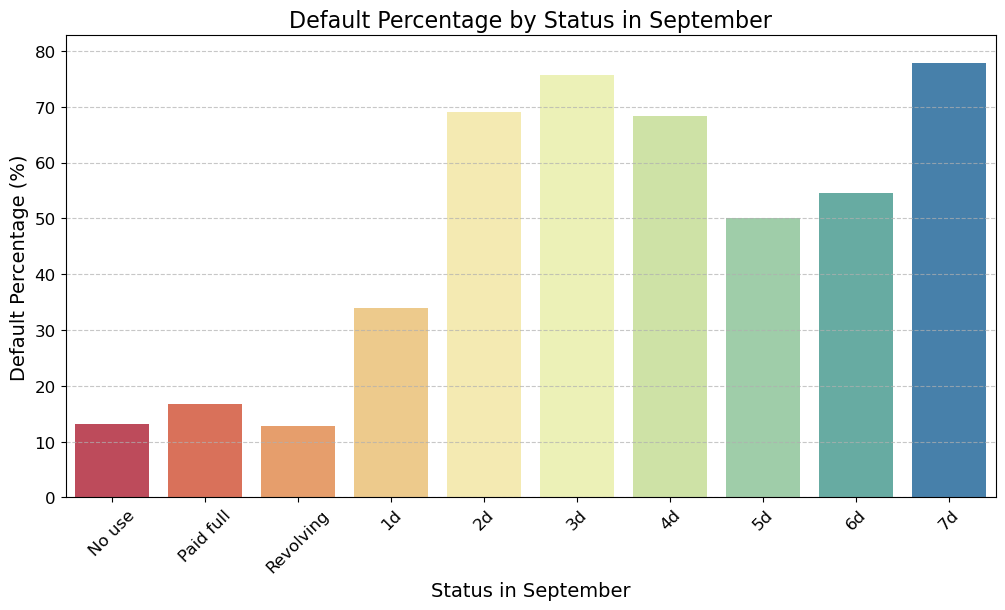

In [87]:
# Set the order of status_sept
status_order = ["No use", "Paid full", "Revolving", "1d", "2d", "3d", "4d", "5d", "6d", "7d"]

# Filter the data to include only specified statuses
filtered_data = credit_df[credit_df['status_sept'].isin(status_order)]

# Calculate default percentage for the specified order
status_default_summary = (
    filtered_data.groupby('status_sept')['default']
    .mean()
    .reset_index()
    .rename(columns={'default': 'Default_Percentage'})
)

# Convert to percentage
status_default_summary['Default_Percentage'] *= 100

# Ensure the order is preserved
status_default_summary['status_sept'] = pd.Categorical(
    status_default_summary['status_sept'], categories=status_order, ordered=True
)

# Sort by the specified order
status_default_summary = status_default_summary.sort_values(by='status_sept')

# Display the calculated default percentages
print(status_default_summary)

# Visualization of default percentages by status_sept
plt.figure(figsize=(12, 6))
sns.barplot(
    x='status_sept',
    y='Default_Percentage',
    data=status_default_summary,
    palette='Spectral'
)
plt.title('Default Percentage by Status in September', fontsize=16)
plt.xlabel('Status in September', fontsize=14)
plt.ylabel('Default Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, status_default_summary['Default_Percentage'].max() + 5)  # Add some space above max value
plt.show()


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/342861377.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis')
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/342861377.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis')
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/342861377.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_p

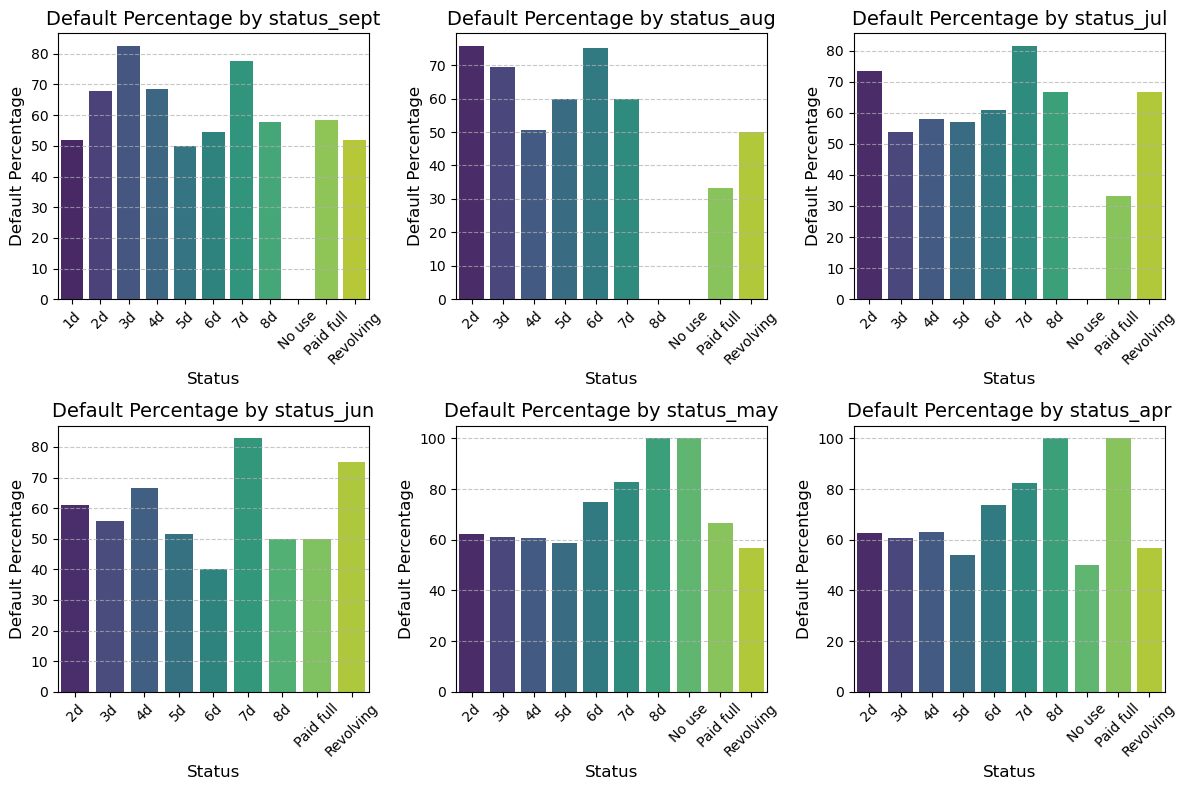

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
status_columns = ['status_sept', 'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr']

# Define the categories of interest (greater than 3 days)
categories_of_interest = ['4d', '5d', '6d', '7d', '8d', '9+d']

# Filter the dataset for these categories only
filtered_df = credit_df[credit_df[status_columns].isin(categories_of_interest).any(axis=1)]

# Create a new column for default percentage
def calc_default_percentage(df, status_column):
    # Calculate the default percentage for each status category
    default_percentage = df.groupby(status_column)['default'].mean() * 100
    return default_percentage

# Plot default percentage for each status column
plt.figure(figsize=(12, 8))

for i, column in enumerate(status_columns, 1):
    plt.subplot(2, 3, i)
    default_percentage = calc_default_percentage(filtered_df, column)
    sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis')
    plt.title(f'Default Percentage by {column}', fontsize=14)
    plt.xlabel('Status', fontsize=12)
    plt.ylabel('Default Percentage', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


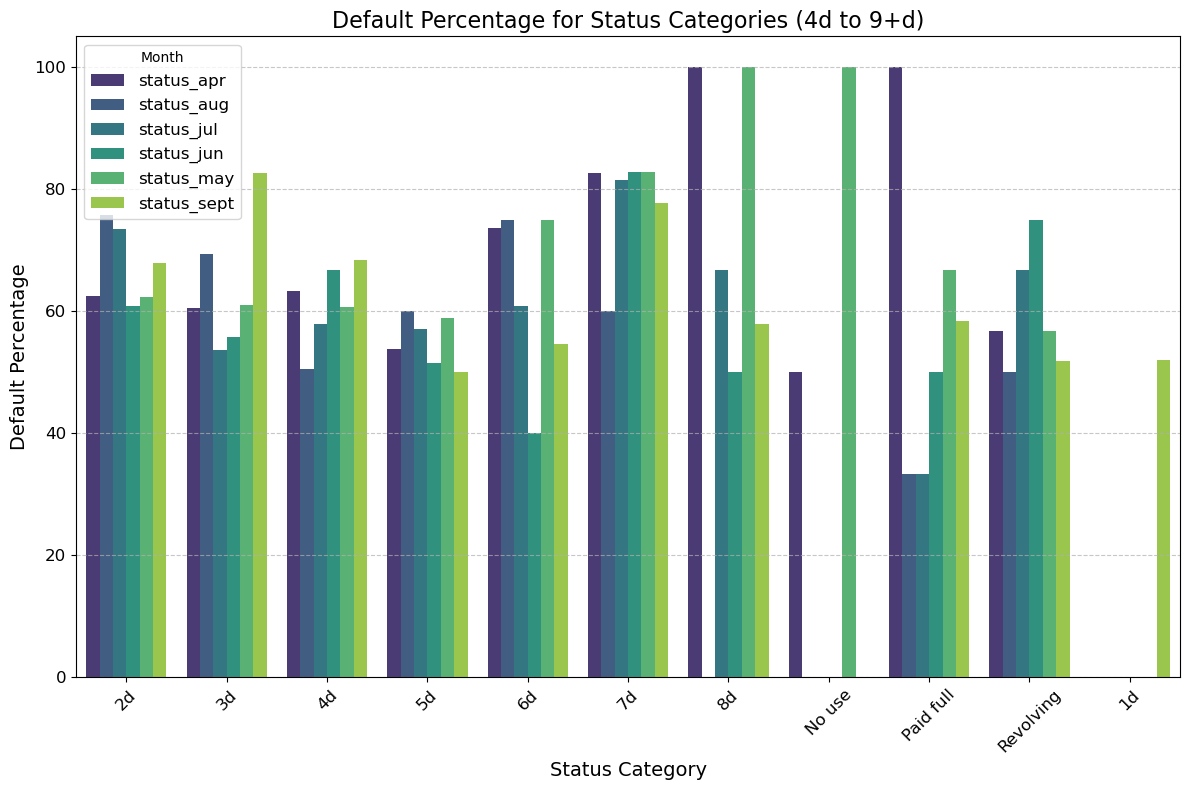

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
status_columns = ['status_sept', 'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr']

# Define the categories of interest (greater than 3 days)
categories_of_interest = ['4d', '5d', '6d', '7d', '8d', '9+d']

# Filter the data to include only rows with values in the categories of interest
filtered_df = credit_df[credit_df[status_columns].isin(categories_of_interest).any(axis=1)]

# Create a new column to mark the relevant rows for each month
melted_df = filtered_df.melt(id_vars=['default'], value_vars=status_columns, 
                              var_name='Month', value_name='Status')

# Now, calculate the default percentage for each status category within each month
default_percentage = melted_df.groupby(['Month', 'Status'])['default'].mean() * 100

# Reset the index for plotting
default_percentage = default_percentage.reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Status', y='default', hue='Month', data=default_percentage, palette='viridis')

# Customize the plot
plt.title('Default Percentage for Status Categories (4d to 9+d)', fontsize=16)
plt.xlabel('Status Category', fontsize=14)
plt.ylabel('Default Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Month', loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [101]:
credit_df.rename(columns={
    'BILL_AMT1': 'bill_sept',
    'BILL_AMT2': 'bill_aug',
    'BILL_AMT3': 'bill_jul',
    'BILL_AMT4': 'bill_jun',
    'BILL_AMT5': 'bill_may',
    'BILL_AMT6': 'bill_apr',
    'PAY_AMT1': 'paid_sept',
    'PAY_AMT2': 'paid_aug',
    'PAY_AMT3': 'paid_jul',
    'PAY_AMT4': 'paid_jun',
    'PAY_AMT5': 'paid_may',
    'PAY_AMT6': 'paid_apr'
}, inplace=True)

# Print the updated column names
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'status_sept',
       'status_aug', 'status_jul', 'status_jun', 'status_may', 'status_apr',
       'bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
       'paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr',
       'default', 'SEX_MARRIAGE', 'Age_Group', 'Age_Group_10yr'],
      dtype='object')

bill_greater_than_paid
True    22.472043
Name: default, dtype: float64


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/3710407351.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis')


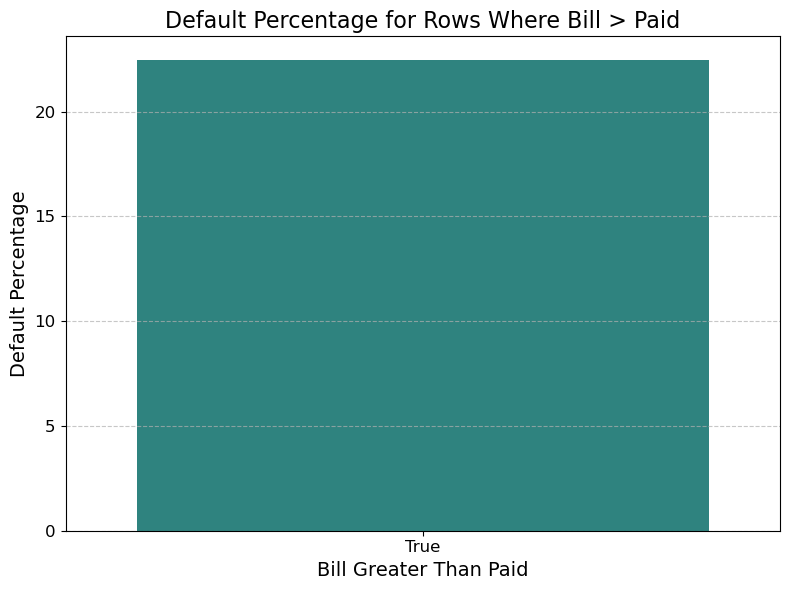

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the bill and paid amounts for all months
credit_df['total_bill'] = credit_df[['bill_sept', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']].sum(axis=1)
credit_df['total_paid'] = credit_df[['paid_sept', 'paid_aug', 'paid_jul', 'paid_jun', 'paid_may', 'paid_apr']].sum(axis=1)

# Create a new column that checks if total bill is greater than total paid
credit_df['bill_greater_than_paid'] = credit_df['total_bill'] > credit_df['total_paid']

# Now, calculate the default percentage for rows where total bill is greater than total paid
default_percentage = credit_df[credit_df['bill_greater_than_paid']].groupby('bill_greater_than_paid')['default'].mean() * 100

# Print the default percentage
print(default_percentage)

# Visualization of the default percentage for the rows where bill > paid
plt.figure(figsize=(8, 6))
sns.barplot(x=default_percentage.index, y=default_percentage.values, palette='viridis')

# Customize the plot
plt.title('Default Percentage for Rows Where Bill > Paid', fontsize=16)
plt.xlabel('Bill Greater Than Paid', fontsize=14)
plt.ylabel('Default Percentage', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


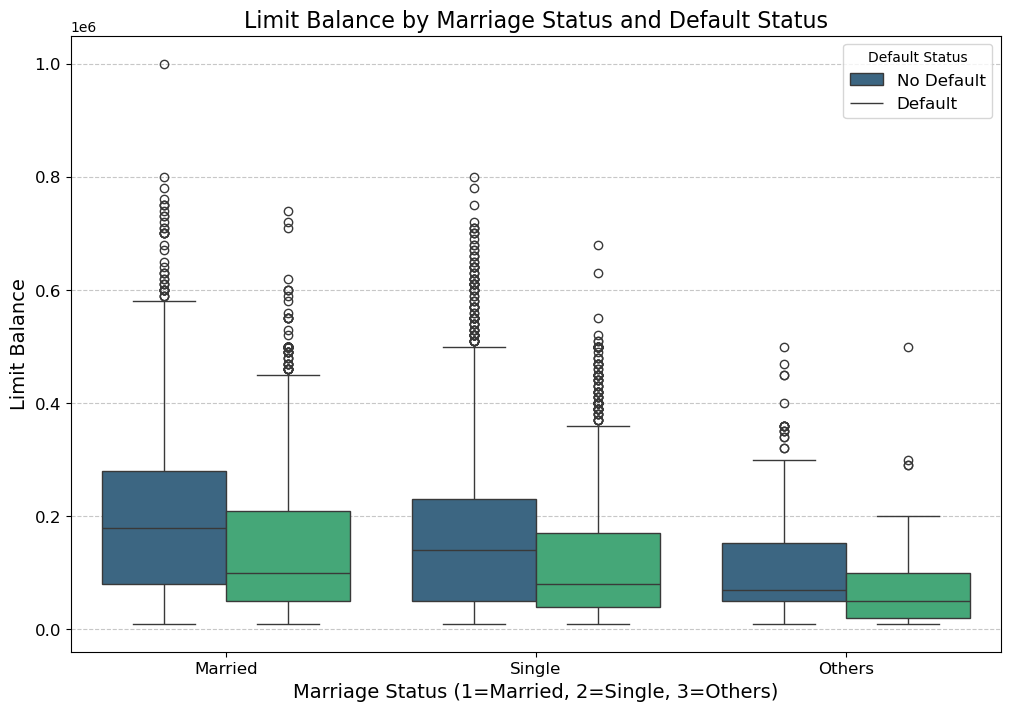

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the box plot
sns.boxplot(
    x='MARRIAGE', 
    y='LIMIT_BAL', 
    hue='default', 
    data=credit_df, 
    palette='viridis'
)

# Adding titles and labels
plt.title('Limit Balance by Marriage Status and Default Status', fontsize=16)
plt.xlabel('Marriage Status (1=Married, 2=Single, 3=Others)', fontsize=14)
plt.ylabel('Limit Balance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the legend
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=12)

# Showing the plot
plt.show()


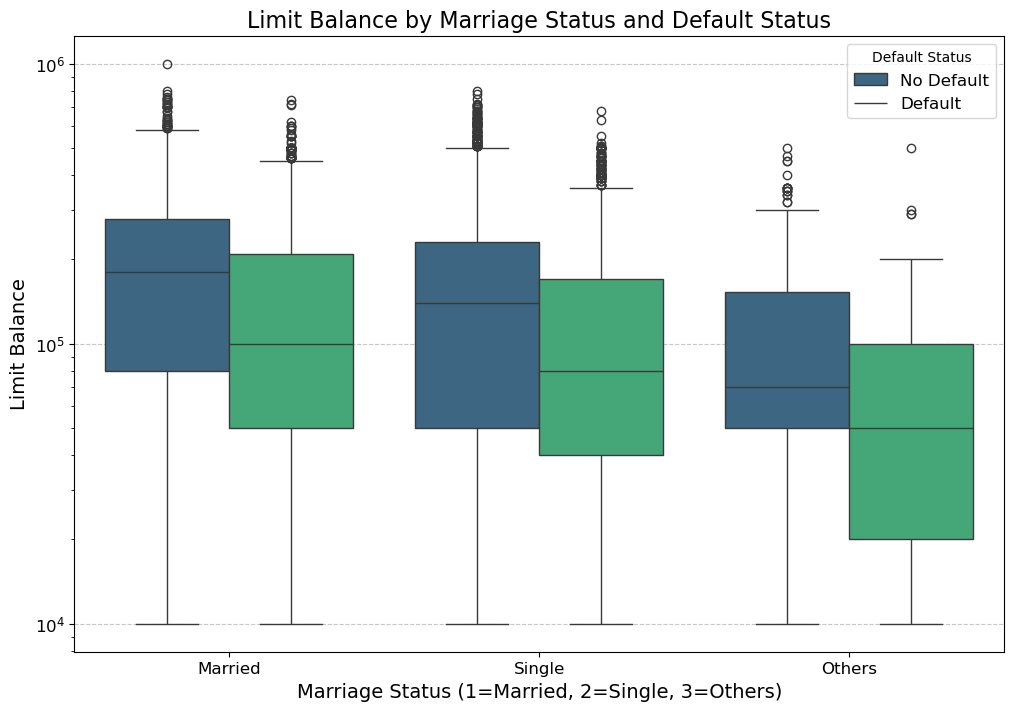

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the box plot
sns.boxplot(
    x='MARRIAGE', 
    y='LIMIT_BAL', 
    hue='default', 
    data=credit_df, 
    palette='viridis'
)

# Adding titles and labels
plt.title('Limit Balance by Marriage Status and Default Status', fontsize=16)
plt.xlabel('Marriage Status (1=Married, 2=Single, 3=Others)', fontsize=14)
plt.ylabel('Limit Balance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting the y-axis scale to better reflect the LIMIT_BAL values
plt.yscale('log')  # Use log scale to make large differences in LIMIT_BAL more visible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the legend
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=12)

# Showing the plot
plt.show()


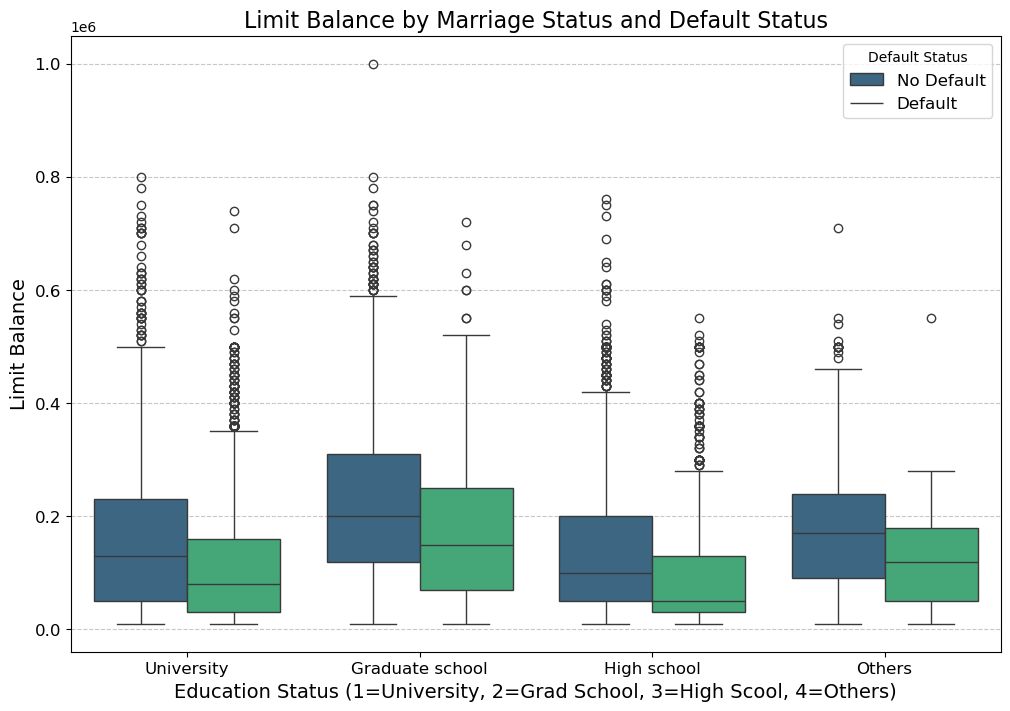

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot
plt.figure(figsize=(12, 8))

# Creating the box plot
sns.boxplot(
    x='EDUCATION', 
    y='LIMIT_BAL', 
    hue='default', 
    data=credit_df, 
    palette='viridis'
)

# Adding titles and labels
plt.title('Limit Balance by Marriage Status and Default Status', fontsize=16)
plt.xlabel('Education Status (1=University, 2=Grad School, 3=High Scool, 4=Others)', fontsize=14)
plt.ylabel('Limit Balance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the legend
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=12)

# Showing the plot
plt.show()

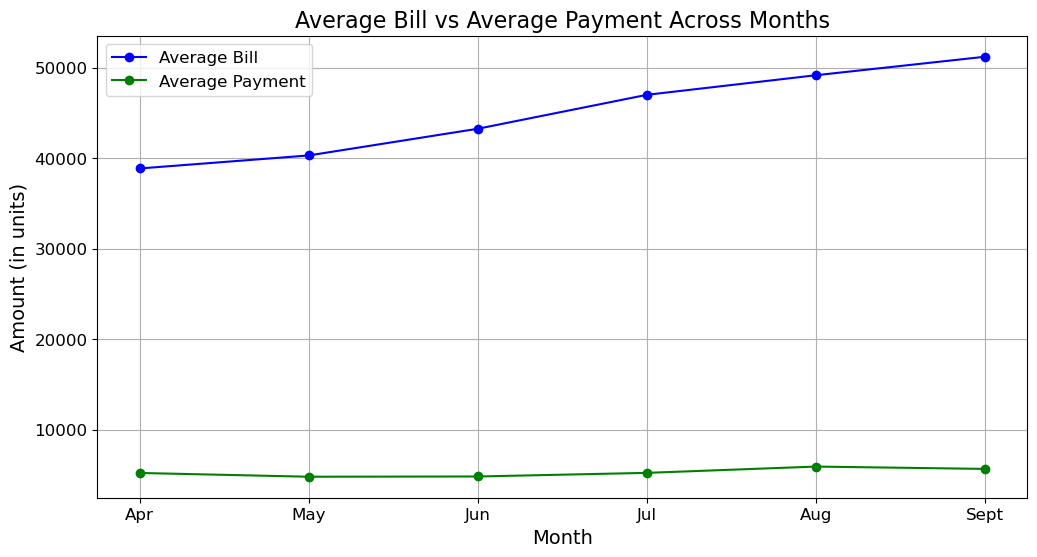

In [119]:
# Plotting bills and payments across months
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept']
bill_columns = ['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']
paid_columns = ['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sept']

plt.figure(figsize=(12, 6))

# Plotting bills
plt.plot(months, credit_df[bill_columns].mean(), label='Average Bill', marker='o', linestyle='-', color='blue')

# Plotting payments
plt.plot(months, credit_df[paid_columns].mean(), label='Average Payment', marker='o', linestyle='-', color='green')

# Adding title and labels
plt.title('Average Bill vs Average Payment Across Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount (in units)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.grid(True)
plt.show()


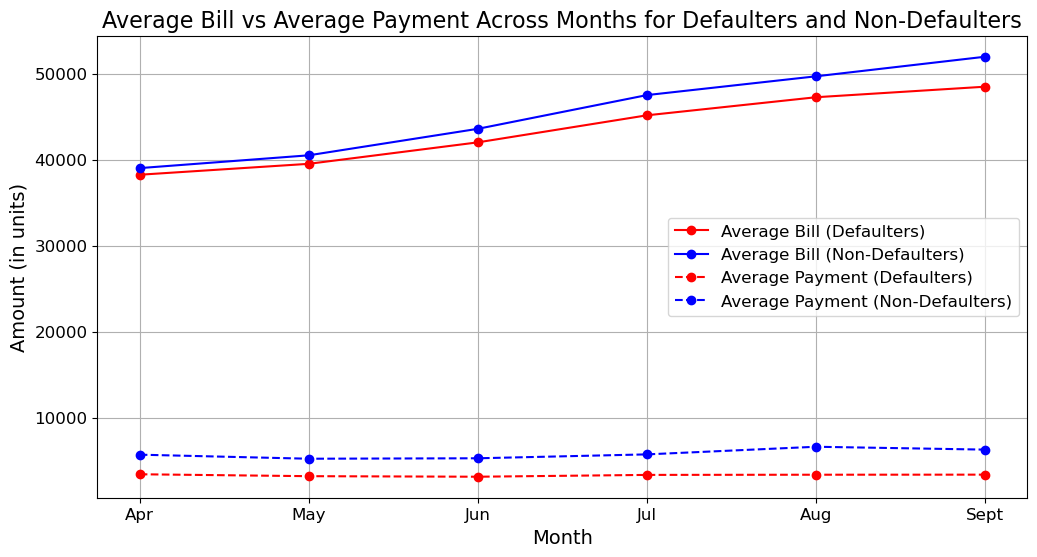

In [125]:
import matplotlib.pyplot as plt

# Defining months and corresponding bill and paid columns
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept']
bill_columns = ['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']
paid_columns = ['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sept']

# Calculate the average bills and payments for defaulters (default = 1) and non-defaulters (default = 0)
avg_bill_default = credit_df[credit_df['default'] == 1][bill_columns].mean()
avg_paid_default = credit_df[credit_df['default'] == 1][paid_columns].mean()

avg_bill_non_default = credit_df[credit_df['default'] == 0][bill_columns].mean()
avg_paid_non_default = credit_df[credit_df['default'] == 0][paid_columns].mean()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting average bills for defaulters and non-defaulters
plt.plot(months, avg_bill_default, label='Average Bill (Defaulters)', marker='o', linestyle='-', color='red')
plt.plot(months, avg_bill_non_default, label='Average Bill (Non-Defaulters)', marker='o', linestyle='-', color='blue')

# Plotting average payments for defaulters and non-defaulters
plt.plot(months, avg_paid_default, label='Average Payment (Defaulters)', marker='o', linestyle='--', color='red')
plt.plot(months, avg_paid_non_default, label='Average Payment (Non-Defaulters)', marker='o', linestyle='--', color='blue')

# Adding title and labels
plt.title('Average Bill vs Average Payment Across Months for Defaulters and Non-Defaulters', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount (in units)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid and legend
plt.grid(True)
plt.legend(fontsize=12)

# Display the plot
plt.show()


/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2482579748.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_df['due_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
/var/folders/jh/mp1rq7qd22lbglyqfp98ctr40000gn/T/ipykernel_31817/2482579748.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

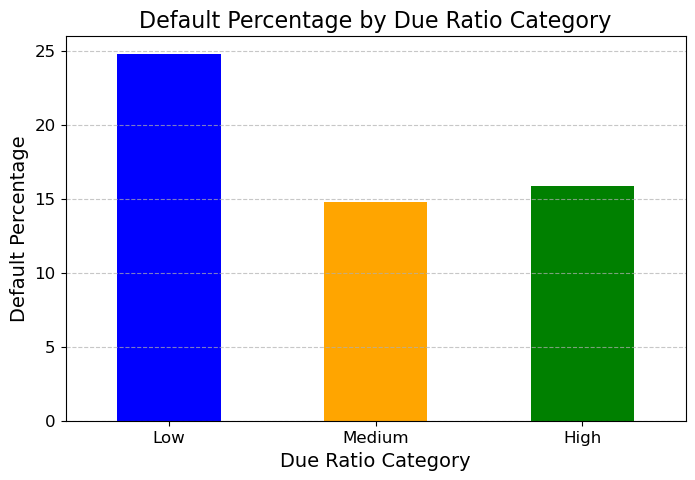

In [139]:
import pandas as pd

# Calculate the due ratio for each data point
credit_df['due_ratio'] = credit_df[['paid_apr', 'paid_may', 'paid_jun', 'paid_jul', 'paid_aug', 'paid_sept']].sum(axis=1) / \
                         credit_df[['bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']].sum(axis=1)

# Handle infinite and NaN values in the due ratio
credit_df['due_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
credit_df['due_ratio'].fillna(0, inplace=True)

# Categorize due ratios into bins: low, medium, high
bins = [0, 0.5, 1, float('inf')]
labels = ['Low', 'Medium', 'High']
credit_df['due_ratio_category'] = pd.cut(credit_df['due_ratio'], bins=bins, labels=labels, right=False)

# Calculate the default percentages for each due ratio category
default_percentage_due_ratio = credit_df.groupby('due_ratio_category')['default'].mean() * 100

# Visualize the results
import matplotlib.pyplot as plt

# Plotting the default percentages for each due ratio category
plt.figure(figsize=(8, 5))
default_percentage_due_ratio.plot(kind='bar', color=['blue', 'orange', 'green'])

# Adding labels and title
plt.title('Default Percentage by Due Ratio Category', fontsize=16)
plt.xlabel('Due Ratio Category', fontsize=14)
plt.ylabel('Default Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
